<a href="https://colab.research.google.com/github/nishantdeswal1810/DeepLearning/blob/main/catDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 192MB/s]
100% 1.06G/1.06G [00:09<00:00, 126MB/s]


In [6]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# Generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalize:
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [10]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 0.9514 - accuracy: 0.6446 - val_loss: 0.6819 - val_accuracy: 0.6692
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5152 - accuracy: 0.7576 - val_loss: 0.5917 - val_accuracy: 0.6990
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4486 - accuracy: 0.7991 - val_loss: 0.5251 - val_accuracy: 0.7658
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3688 - accuracy: 0.8401 - val_loss: 0.6539 - val_accuracy: 0.7392
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2648 - accuracy: 0.8899 - val_loss: 0.8459 - val_accuracy: 0.6910
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1925 - accuracy: 0.9234 - val_loss: 0.9029 - val_accuracy: 0.7252
Epoch 7/10
625/625 [==============================] - 78s 124ms/step - loss: 0.1201 - accuracy: 0.9559 - val_loss: 0.7345 - val_ac

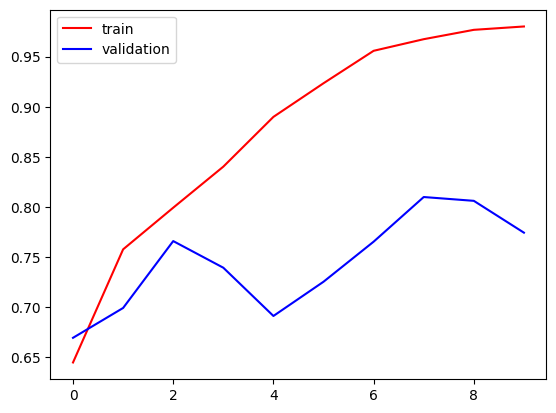

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

we can see that accuracy of training data is increasing but the accuracy of validation data becomes constant and the gap between these two is significant. This shows that we have overfitting.
**before adding batch normalization and dropout**

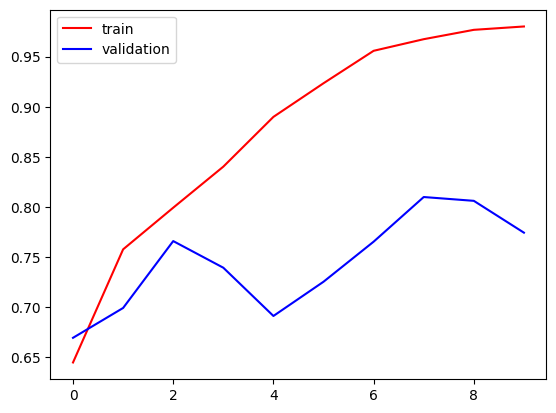

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

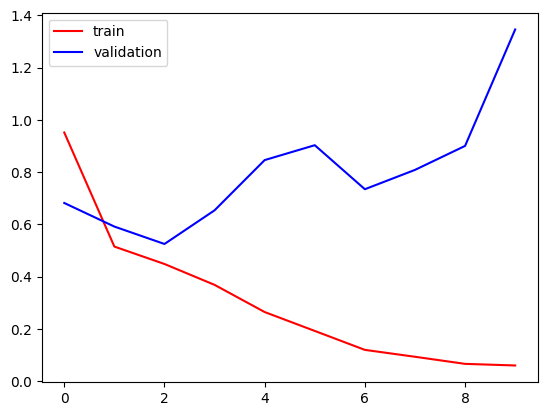

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Ways to reduce overfitting:
1. Add more data
2. Data Augmentation
3. L1/L2 Regularizer
4. Dropout
5. Batch Normalization
6. Reduce complexity

In [17]:
import cv2

In [26]:
test_img=cv2.imread('dog.jpg')

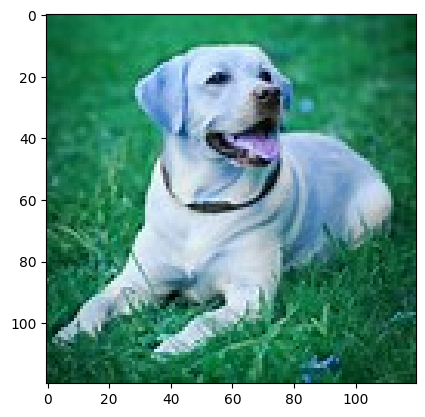

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(120, 120, 3)

In [29]:
test_img=cv2.resize(test_img,(256,256))

In [30]:
test_input= test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)